<a href="https://colab.research.google.com/github/SowmyaNihitha/Aiml_internal/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Logistic Regression**


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/wine-quality-dataset


In [ ]:
import os
print(os.listdir("/kaggle/input/wine-quality-dataset"))

['WineQT.csv']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#Identify features and target variable
X=df.drop('quality',axis=1)
y=df['quality']

In [ ]:
#Handle missing values
print("Missing values:",df.isnull().sum())
#If missing values present, X.fillna(X.mean(),inplace=True)
#or
'''from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
X=imputer.fit_transform(X)'''

Missing values: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


"from sklearn.impute import SimpleImputer\nimputer=SimpleImputer(strategy='mean')\nX=imputer.fit_transform(X)"

In [ ]:
#Standardize the features
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Model Training
model=LogisticRegression()
model.fit(X_train,y_train)

#Prediction
y_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(classification_report(y_test, y_pred, zero_division=1))
'''Precision: Of all predictions made as class X, how many were actually correct?

Recall: Of all true examples of class X, how many did the model correctly predict?

F1-score: Harmonic mean of precision and recall. A good balance between them.'''

Accuracy: 0.64
Precision: 0.62
Recall: 0.64
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.63      0.64      0.63        99
           7       0.52      0.50      0.51        26
           8       1.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.57      0.37      0.37       229
weighted avg       0.63      0.64      0.63       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'Precision: Of all predictions made as class X, how many were actually correct?\n\nRecall: Of all true examples of class X, how many did the model correctly predict?\n\nF1-score: Harmonic mean of precision and recall. A good balance between them.'

Confusion Matrix:
[[ 0  3  3  0  0]
 [ 1 70 23  2  0]
 [ 0 28 63  8  0]
 [ 0  2 11 13  0]
 [ 0  0  0  2  0]]


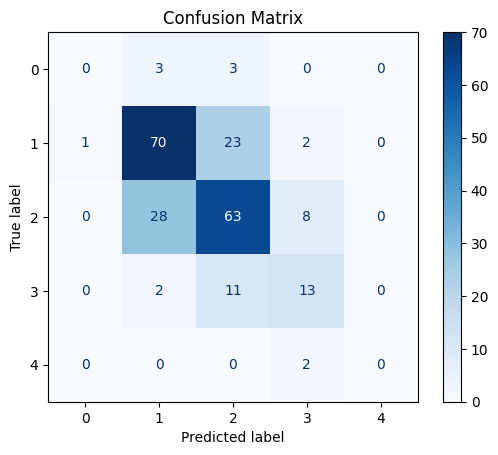

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Use the unique classes from y_test for labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# 2. **Naive Bayes**

In [ ]:
#Naive Bayes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score
df = pd.read_csv('/content/Titanic-Dataset.csv')
# Preprocessing
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
# Features and target variable
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train the model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test,y_pred)}')
print(f'Recall: {recall_score(y_test,y_pred)}')
print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-survived', 'survived'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 3. **Decision Tree**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score

df = pd.read_csv('/content/Titanic-Dataset.csv')

# Preprocessing
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


# Features and target variable
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Decision Tree Classifier ###
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
plt.figure(figsize=(16,10))
plot_tree(dt_model,filled=True,feature_names=X.columns,class_names=["Non-Survived","Survived"])
plt.title("Decision tree for Titanic Survival")
print("\n--- Decision Tree Classifier ---")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

### 2. Random Forest Classifier ###
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("\n--- Random Forest Classifier ---")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

### 3. Bagging Classifier ###
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

print("\n--- Bagging Classifier ---")
print(f"Accuracy: {bagging_accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, bagging_pred))
print("Classification Report:\n", classification_report(y_test, bagging_pred))

### 4. AdaBoost Classifier ###
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)

print("\n--- AdaBoost Classifier ---")
print(f"Accuracy: {boosting_accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, boosting_pred))
print("Classification Report:\n", classification_report(y_test, boosting_pred))

#Stacking classifier
stack = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier()),
    ('svm',SVC(probability=True)),
    ('rf',RandomForestClassifier())
], final_estimator=LogisticRegression(),cv=5)
stack.fit(X_train,y_train)
y_pred_stack=stack.predict(X_test)

accuracy=accuracy_score(y_test,y_pred_stack)
precision=precision_score(y_test,y_pred_stack,average='weighted')
recall=recall_score(y_test,y_pred_stack,average='weighted')


print("\n--- Voting Classifier ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

### Summary of Results ###
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'Stacking'],
    'Accuracy': [dt_accuracy, rf_accuracy, bagging_accuracy, boosting_accuracy, accuracy]
}

results_df = pd.DataFrame(results)
print("\n--- Model Comparison ---")
print(results_df)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.9)
plt.show()


# 4. **SVM**


Accuracy: 0.9888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0

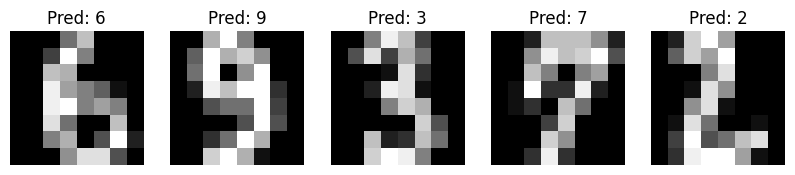

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from matplotlib.colors import ListedColormap

# 1. Load the digits dataset
digits = datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1))  # Flatten the images
y = digits.target

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=SVC(kernel='rbf',gamma=0.001,C=100.0)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

plt.figure(figsize=(10,4))
for i in range(5):  # Loop 5 times (for 5 images)
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')  # Simplified cmap
    plt.title(f'Pred: {y_pred[i]}')  # Shorter title
    plt.axis('off')  # Hide axes for cleaner look

plt.show()


# **5. Clustering**

Confusion Matrix (clusters vs true labels))
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


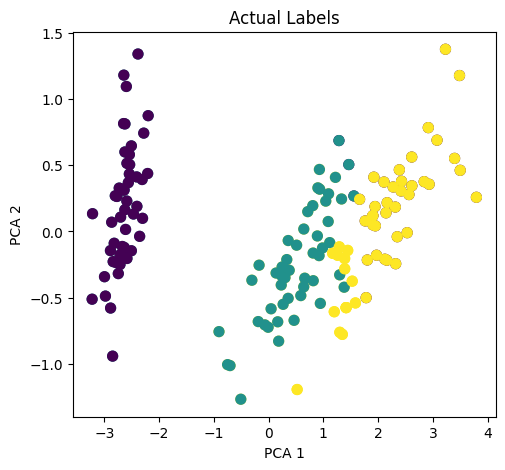

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y_t = iris.target

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

#Compare clusters with actual labels
print("Confusion Matrix (clusters vs true labels))")
print(confusion_matrix(y_t,labels))

#Reduce dimensions for visualization (using PCA)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

plt.figure(figsize=(12,5))
#plot predicted clusters
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels,cmap='viridis',s=50)
plt.title('K-Means Clustering (Predicted)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot actual labels plt.subp6lot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_t, cmap='viridis', s=50)
plt.title('Actual Labels')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()


